# Feature Matching
---

## Set Up

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

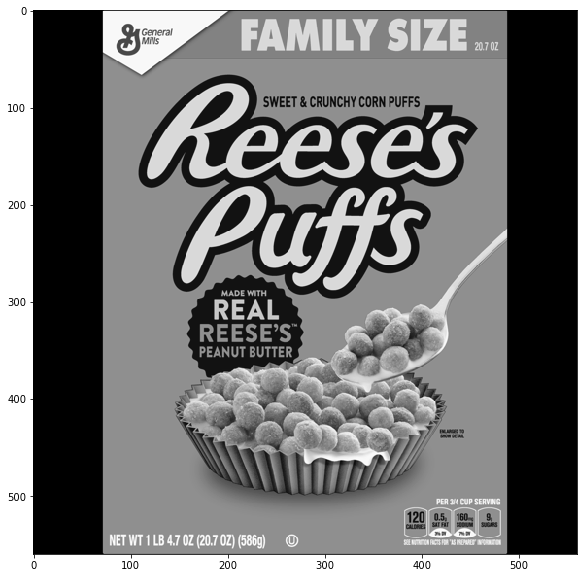

In [2]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)
display(reeses)

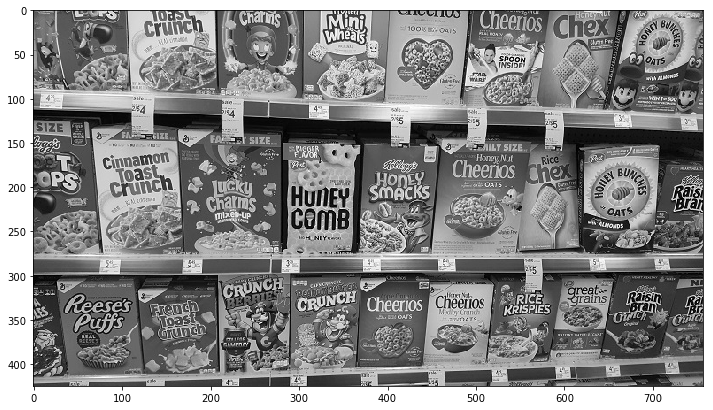

In [3]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)
display(cereals)

## ORB Brute Force

In [4]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None) # detects features of small image
kp2, des2 = orb.detectAndCompute(cereals, None) # detects features of large image

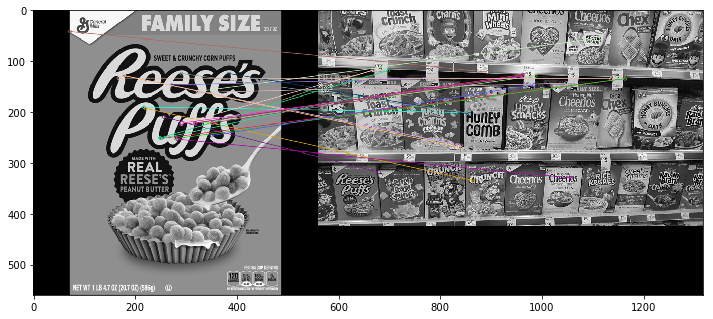

In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_matches)


## Brute Force Matching 2 - SIFT Matches

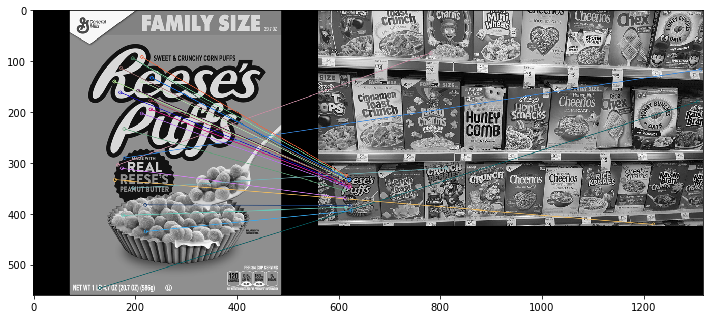

In [6]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
good = []

# Less Dist = better match
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

reeses_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good[:25], None, flags=2)
display(reeses_matches)

## FLANN Matching

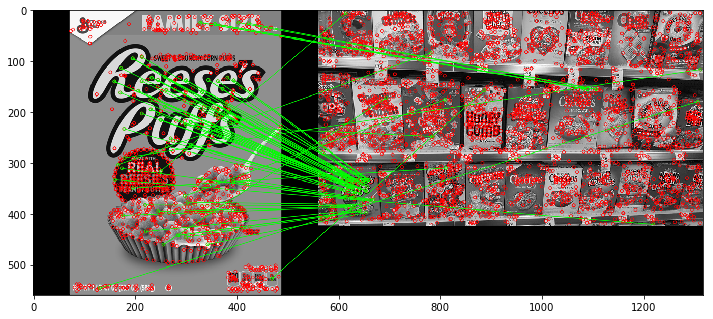

In [7]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

# Fast Library Approximate Nearest Neighbours
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0,0] for i in range (len(matches))]

for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor=(0, 255, 0),singlePointColor=(255, 0, 0), matchesMask = matchesMask, flags=0)

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)